# CSE185 Group 9 Project--Code for figure 5c

### Dataset:
[GSE154543](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE154543)

In [1]:
# Change the sample names in the input file to experimental names
Discription = {
    "DACE060_IGO_10855_14_S107": "Kras*_PBS_d0_RNA1",
    "DACE114_IGO_10855_12_S105": "Kras*_PBS_d0_RNA2",
    "DACE115_IGO_10855_10_S103": "Kras*_PBS_d0_RNA3",
    "DACE059_IGO_10855_13_S106": "Kras*_rIL-33_d0_RNA1",
    "DACE116_IGO_10855_11_S104": "Kras*_rIL-33_d0_RNA2",
    "DACE117_IGO_10855_8_S101": "Kras*_rIL-33_d0_RNA3",
    "DACE118_IGO_10855_9_S102": "Kras*_rIL-33_d0_RNA4",
    
    "DACD928_IGO_10855_4_S97": "Kras*_PBS_d21_RNA2",
    "DACD923_IGO_10855_2_S95": "Kras*_PBS_d21_RNA1",
    "DACE103_IGO_10855_19_S112": "Kras*_PBS_d21_RNA3",
    "DACE120_IGO_10855_18_S111": "Kras*_PBS_d21_RNA4",
    
    "DACD917_IGO_10855_3_S96": "Kras*_rIL-33_d21_RNA1",
    "DACE101_IGO_10855_17_S110": "Kras*_rIL-33_d21_RNA2",
    "DACE107_IGO_10855_20_S113": "Kras*_rIL-33_d21_RNA3",
    "DACD912_IGO_10855_5_S98":"Kras*_rIL-33_d21_RNA4",
    
    "DACD921_IGO_10855_1_S94":'Normal_PBS_d21_RNA1',
    "DACD926_IGO_10855_7_S100":"Normal_PBS_d21_RNA2",
    "DACE069_IGO_10855_21_S114":"Normal_PBS_d21_RNA3",
    "DACE109_IGO_10855_22_S115":"Normal_PBS_d21_RNA4",
    "DACE110_IGO_10855_26_S119":"Normal_PBS_d21_RNA5",
    
    "DACD925_IGO_10855_6_S99":"Normal_rIL-33_d21_RNA1",
    "DACE068_IGO_10855_24_S117":"Normal_rIL-33_d21_RNA2",
    "DACE097_IGO_10855_25_S118":"Normal_rIL-33_d21_RNA3",
    "DACE111_IGO_10855_23_S116":"Normal_rIL-33_d21_RNA4"

    
}

In [2]:
# load data
import pandas as pd
matrix = pd.read_csv("GSE154543_Alonso-Curbelo_RNASeq_SET3.csv")

In [3]:
# Rename data 
for old, new in Discription.items():
    matrix.rename(columns = {old:new}, inplace = True)

In [4]:
# Check
matrix

,ID,Kras*_rIL-33_d21_RNA1,Kras*_rIL-33_d21_RNA4,Normal_PBS_d21_RNA1,Kras*_PBS_d21_RNA1,Normal_rIL-33_d21_RNA1,Normal_PBS_d21_RNA2,Kras*_PBS_d21_RNA2,Kras*_rIL-33_d0_RNA1,Kras*_PBS_d0_RNA1,...,Kras*_PBS_d21_RNA4,Gene_name,chromosome_name,start_position,end_position,transcript_length,Strand,Karyotype_band,GO_term,GO_accession
0,ENSMUSG00000000001,796,1258,238,1079,225,222,1139,2281,1258,...,1109,Gnai3,3,108107280,108146146,3262,-,F2.3,membrane/metal ion binding/plasma membrane/nuc...,GO:0016020/GO:0046872/GO:0005886/GO:0005634/GO...
1,ENSMUSG00000000003,0,0,0,0,0,0,0,0,0,...,0,Pbsn,X,77837901,77853623,902,-,B,extracellular region,GO:0005576
2,ENSMUSG00000000028,30,45,18,45,6,6,34,110,57,...,39,Cdc45,16,18780447,18811987,2252,-,A3,nucleus/DNA duplex unwinding/DNA replication/c...,GO:0005634/GO:0032508/GO:0006260/GO:0007049/GO...
3,ENSMUSG00000000031,35,57,5,52,20,14,64,462,122,...,2404,H19,7,142575529,142578143,2460,-,F5,NaN,NaN
4,ENSMUSG00000000037,4,3,2,2,0,0,14,4,10,...,14,Scml2,X,161117193,161258213,6079,+,F4,"nucleus/regulation of transcription, DNA-templ...",GO:0005634/GO:0006355/GO:0005515/GO:0034613/GO...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53460,ENSMUSG00000115846,0,0,0,0,0,0,0,0,0,...,0,AC107711.6,14,45541173,45543567,1088,-,C1,NaN,NaN
53461,ENSMUSG00000115847,0,0,0,0,0,0,0,0,0,...,0,AC109172.2,14,82855964,82856344,381,-,D3,NaN,NaN
53462,ENSMUSG00000115848,0,0,0,0,0,0,0,0,0,...,0,AC114008.2,15,37171058,37172404,1347,-,B3.1,NaN,NaN
53463,ENSMUSG00000115849,0,0,0,0,0,0,0,0,0,...,0,AC156016.5,14,47261832,47262186,355,-,C1,NaN,NaN


In [5]:
# Save for using in R
matrix.to_csv("5cMatrix.csv")

In [6]:
# Load R to run DESeq2
%load_ext rpy2.ipython
import warnings
warnings.filterwarnings('ignore')

In [7]:
%%R
# Load library
library("DESeq2")
# Read renamed output
featurecounts <- read.csv("5cMatrix.csv")
# Define condition for DESeq2
column.from = which(colnames(featurecounts) == "ID") + 1
column.end  = which(colnames(featurecounts) == "Gene_name") - 1
coldata = data.frame(condition = c('Kras._rIL.33_d21',
                                   'Kras._rIL.33_d21',
                                   'Normal_PBS_d21',
                                   'Kras._PBS_d21',
                                   'Normal_rIL.33_d21',
                                   'Normal_PBS_d21',
                                   'Kras._PBS_d21',
                                   'Kras._rIL.33_d0',
                                   'Kras._PBS_d0',
                                   'Normal_rIL.33_d21',
                                   'Normal_PBS_d21',
                                   'Normal_rIL.33_d21',
                                   'Kras._rIL.33_d21',
                                   'Kras._PBS_d21',
                                   'Kras._rIL.33_d21',
                                   'Normal_PBS_d21',
                                   'Normal_PBS_d21',
                                   'Normal_rIL.33_d21',
                                   'Kras._PBS_d0',
                                   'Kras._PBS_d0',
                                   'Kras._rIL.33_d0',
                                   'Kras._rIL.33_d0',
                                   'Kras._rIL.33_d0',
                                   'Kras._PBS_d21'
                                  ), stringsAsFactors = TRUE)
dds <- 
DESeqDataSetFromMatrix(countData = featurecounts[, column.from:column.end],
                       colData = coldata,
                       design = ~condition)
rownames(dds) <- featurecounts$ID
# Filter genes with low counts
keep <- rowSums(counts(dds)) >= 10
dds <- dds[keep,]
# Create subset of DESeqDataSet for comparison
dds.Kras <- dds[ , dds$condition %in% c("Kras._PBS_d21", "Kras._rIL.33_d21") ]
dds.Kras$condition <- droplevels(dds.Kras$condition)
dds.Norm <- dds[ , dds$condition %in% c("Normal_PBS_d21", "Normal_rIL.33_d21") ]
dds.Norm$condition <- droplevels(dds.Norm$condition)
# Perform DESeq
dds.Kras <- DESeq(dds.Kras)
dds.Norm <- DESeq(dds.Norm)
# Export result to csv for plotting in python
resKrasd21 <- results( dds.Kras, contrast = c("condition", "Kras._rIL.33_d21", "Kras._PBS_d21") )
resKrasd21
write.csv(as.data.frame(resKrasd21), file="Krasd21.csv")
resNormd21 <- results( dds.Norm, contrast = c("condition", "Normal_rIL.33_d21", "Normal_PBS_d21") )
resNormd21
write.csv(as.data.frame(resNormd21), file="Normd21.csv")
# Check package version
sessionInfo()


R[write to console]: Loading required package: S4Vectors

R[write to console]: Loading required package: stats4

R[write to console]: Loading required package: BiocGenerics

R[write to console]: Loading required package: parallel

R[write to console]: 
Attaching package: ‘BiocGenerics’


R[write to console]: The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


R[write to console]: The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


R[write to console]: The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, 

R version 4.0.5 (2021-03-31)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS 12.4

Matrix products: default
LAPACK: /Users/haoranzhang/miniconda3/envs/scRNAseq/lib/libopenblasp-r0.3.18.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
 [1] parallel  stats4    tools     stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] DESeq2_1.30.1               SummarizedExperiment_1.20.0
 [3] Biobase_2.50.0              MatrixGenerics_1.2.1       
 [5] matrixStats_0.61.0          GenomicRanges_1.42.0       
 [7] GenomeInfoDb_1.26.7         IRanges_2.24.1             
 [9] S4Vectors_0.28.1            BiocGenerics_0.36.1        

loaded via a namespace (and not attached):
 [1] genefilter_1.72.1      locfit_1.5-9.4         tidyselect_1.1.1      
 [4] purrr_0.3.4            splines_4.0.5          lattice_0.20-45       
 [7] generics_0.1.1         colorspace_2.0-2       vctrs_0

In [8]:
# Import packages for plotting
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

(-1.0, 20.0)

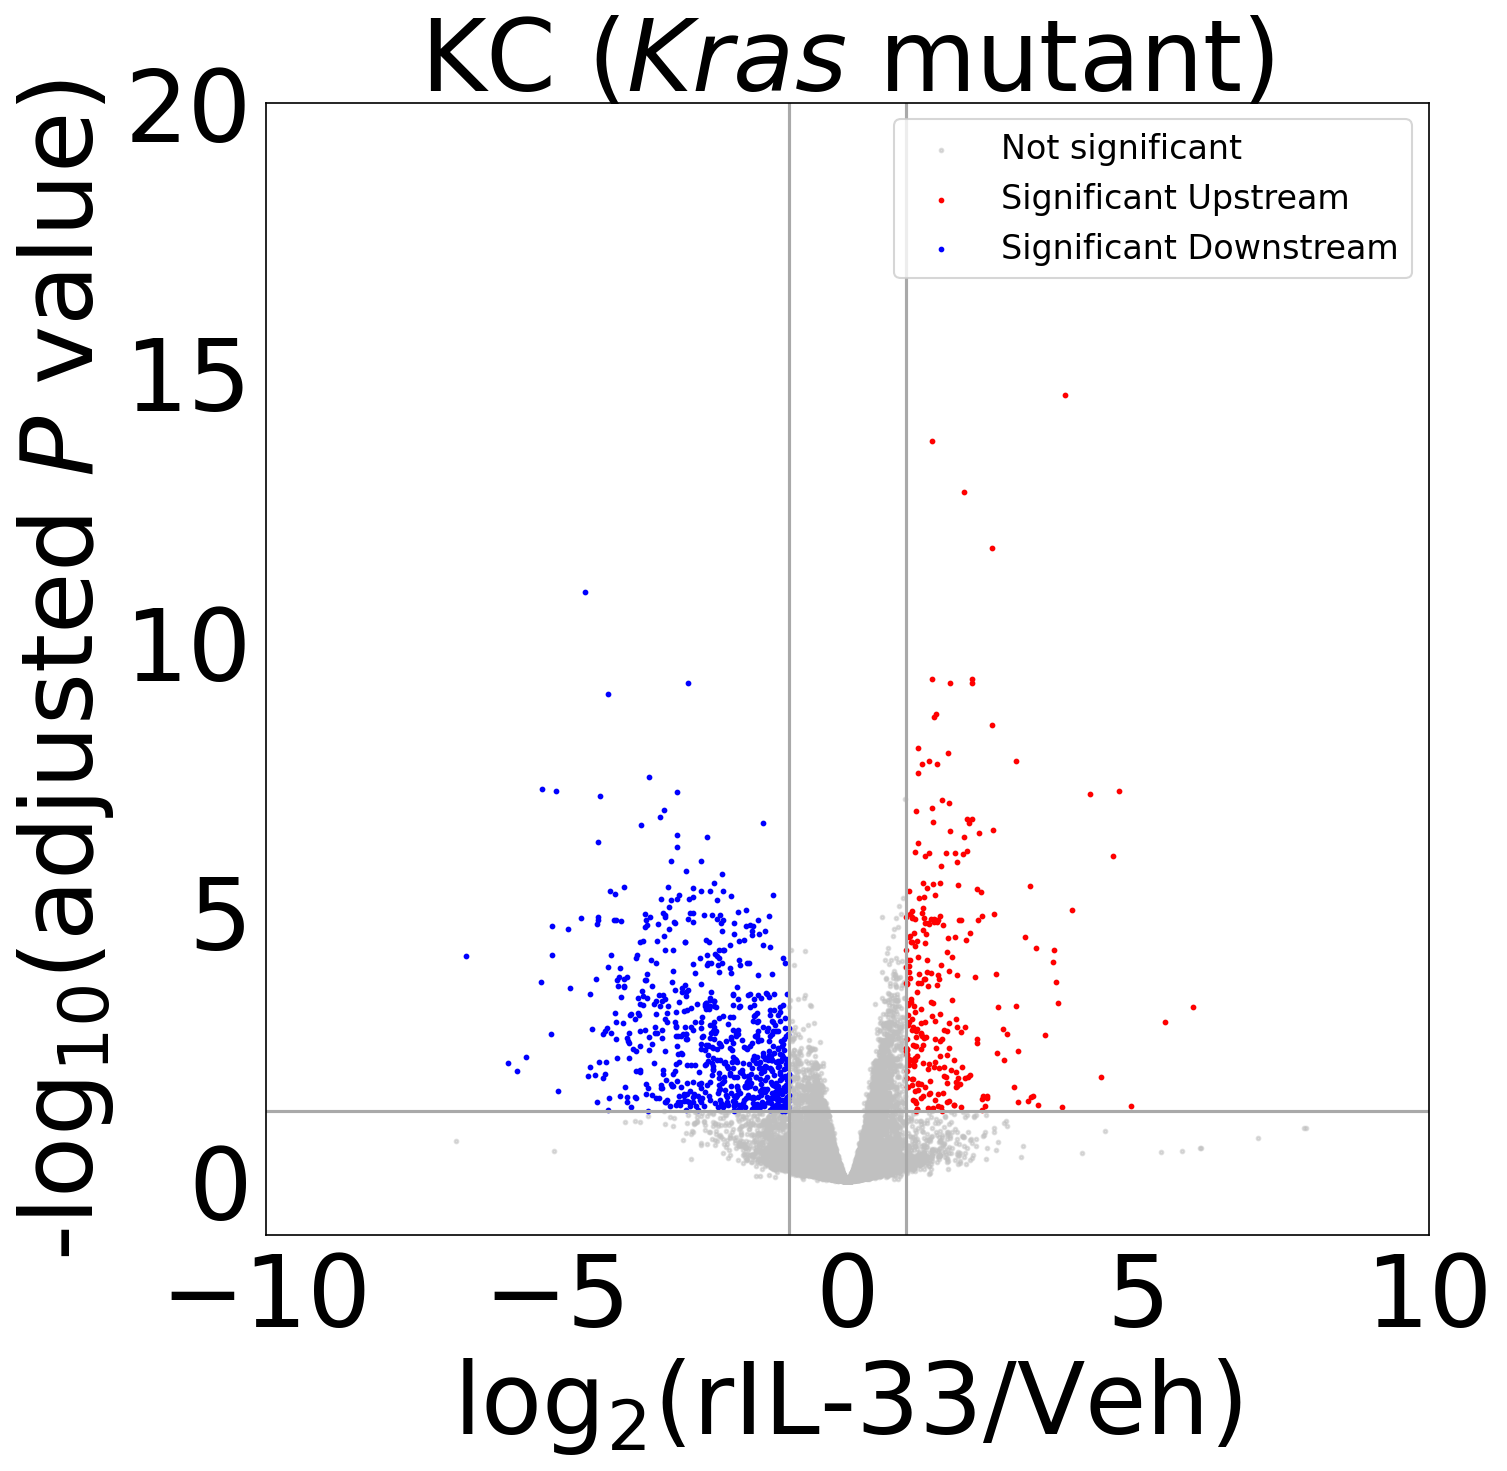

In [9]:
# Plot KC (Kras mutant)
deresults = pd.read_csv("Krasd21.csv")
deresults = deresults[-np.isnan(deresults["pvalue"])]
deresults = deresults.rename({"Unnamed: 0": "gene_id"}, axis = 'columns')
geneName = open('genelist.csv', 'r')
lines = geneName.readlines()
geneNameDict = {}
for line in lines:
    geneNameDict[line.split()[0]]= line.split()[1]
deresults["gene_name"] = pd.NaT
for i,gene in deresults.iterrows():
    deresults.loc[i,"gene_name"] = geneNameDict[deresults.loc[i,"gene_id"]]
deresults.sort_values(["padj"],axis=0,
                    ascending=[True], 
                    inplace=True)
geneName.close()
significantDown = deresults.query('padj < 0.05 & log2FoldChange < -1')
significantUp = deresults.query('padj < 0.05 & log2FoldChange > 1')
x = deresults.log2FoldChange
y = np.log10(deresults.padj) * (-1)
plt.figure(figsize=(10,10),  dpi = 150)
plt.gca()
plt.scatter(x,y, alpha = 0.5, s = 3, color='silver', label="Not significant")
plt.xlabel(r'$\log_{2}$(rIL-33/Veh)',size=48)
plt.ylabel(r'-$\log_{10}$(adjusted $P$ value)',size=48)
plt.title(r'KC ($Kras$ mutant)', size=48)
plt.xticks(size = 48, ticks = [-10, -5, 0, 5, 10])
plt.yticks(size = 48, ticks = [0,5,10,15,20])
plt.tick_params(left=False, bottom=False)
plt.scatter(significantUp.log2FoldChange, np.log10(significantUp.padj) * (-1), color="red", s = 3, label = 'Significant Upstream')
plt.scatter(significantDown.log2FoldChange, np.log10(significantDown.padj) * (-1), color="blue", s = 3, label = 'Significant Downstream')
plt.legend(loc="best",prop={'size': 16})
plt.axhline(y=np.log10(0.05) * (-1), color='darkgrey', linestyle='-')
plt.axvline(x=1, color='darkgrey', linestyle='-')
plt.axvline(x=-1, color='darkgrey', linestyle='-')
plt.xlim([-10, 10])
plt.ylim([-1, 20])



(-1.0, 20.0)

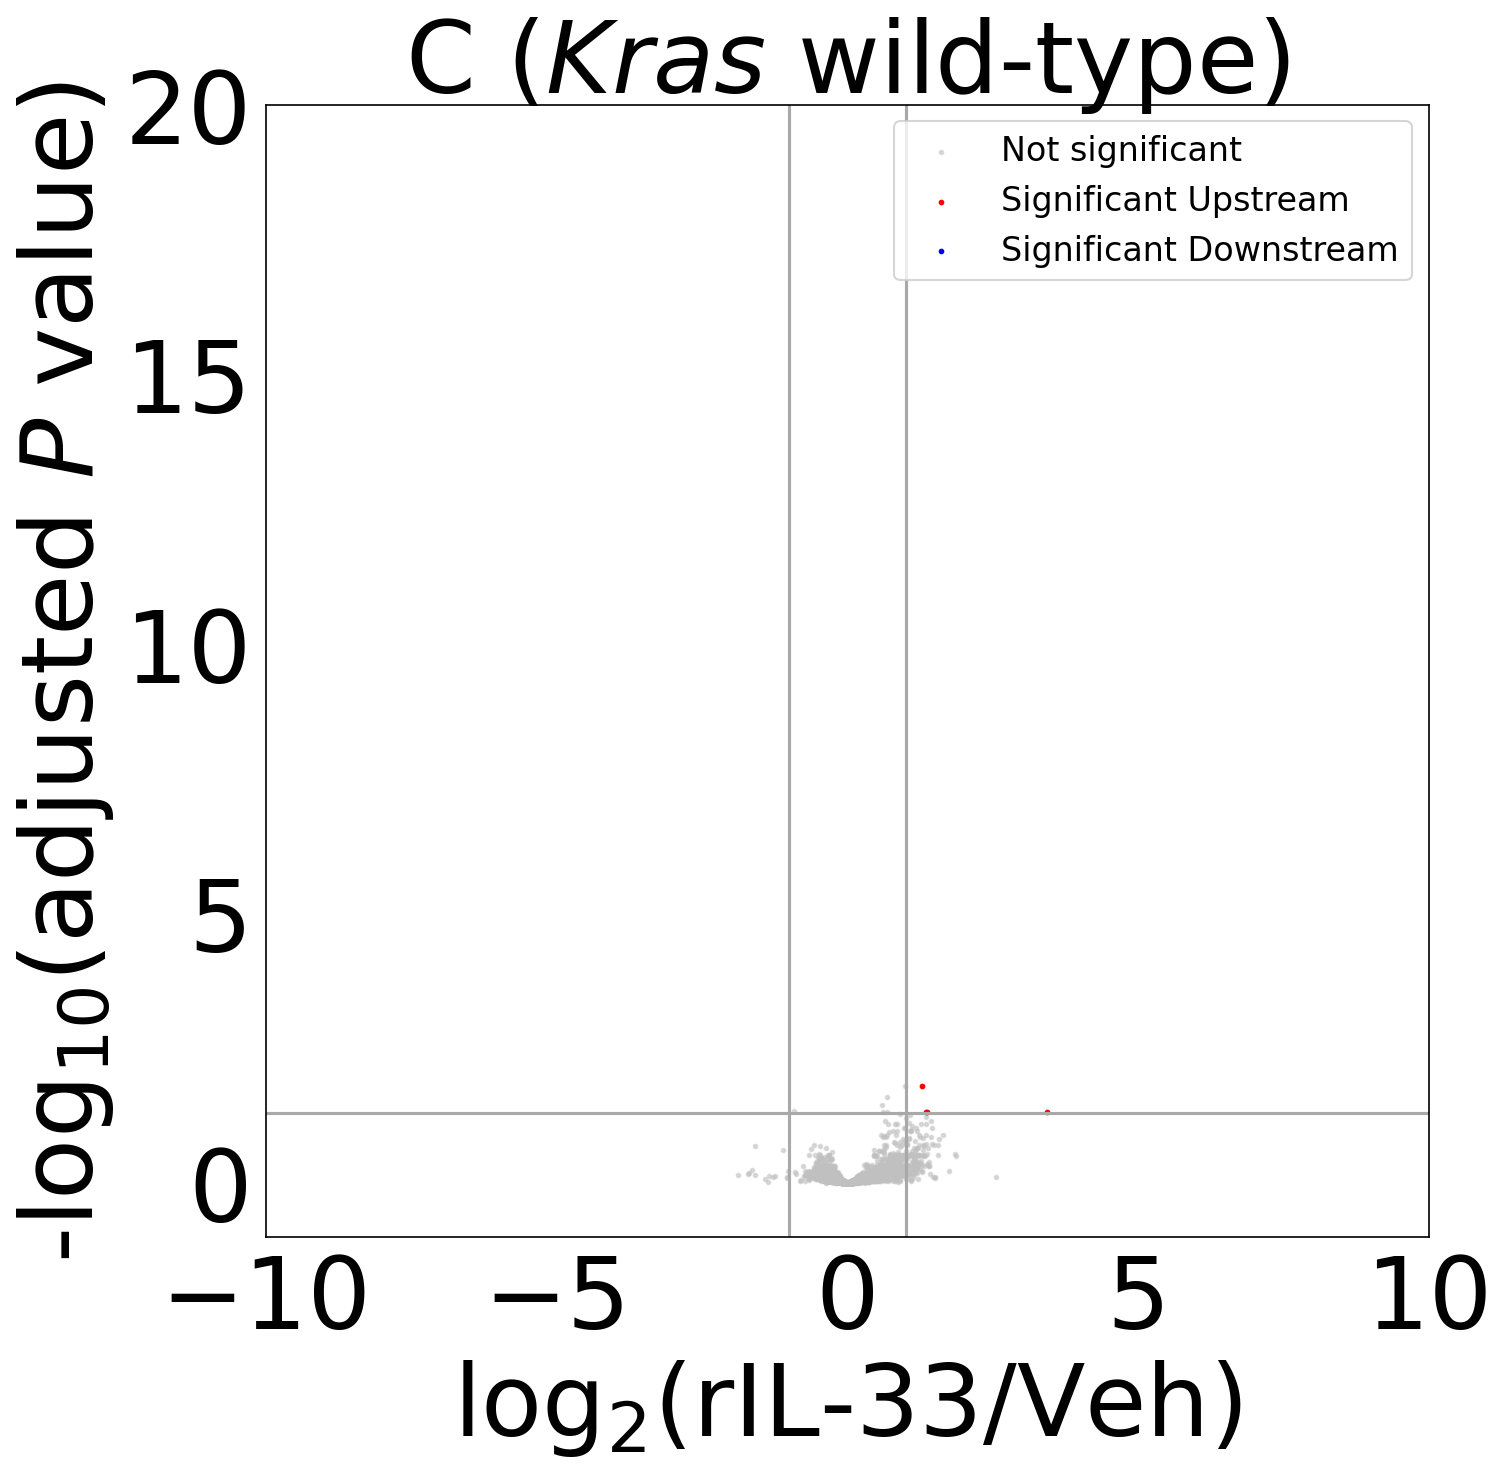

In [10]:
# Plot C (Kras widetype)
deresults = pd.read_csv("Normd21.csv")
deresults = deresults[-np.isnan(deresults["pvalue"])]
deresults = deresults.rename({"Unnamed: 0": "gene_id"}, axis = 'columns')
geneName = open('genelist.csv', 'r')
lines = geneName.readlines()
geneNameDict = {}
for line in lines:  
    geneNameDict[line.split()[0]]= line.split()[1]
deresults["gene_name"] = pd.NaT
for i,gene in deresults.iterrows():
    deresults.loc[i,"gene_name"] = geneNameDict[deresults.loc[i,"gene_id"]]
deresults.sort_values(["padj"],axis=0,
                    ascending=[True], 
                    inplace=True)
geneName.close()
significantDown = deresults.query('padj < 0.05 & log2FoldChange < -1')
significantUp = deresults.query('padj < 0.05 & log2FoldChange > 1')
x = deresults.log2FoldChange
y = np.log10(deresults.padj) * (-1)
plt.figure(figsize=(10,10),  dpi = 150)
plt.gca()
plt.scatter(x,y, alpha = 0.5, s = 3, color='silver', label="Not significant")
plt.xlabel(r'$\log_{2}$(rIL-33/Veh)',size=48)
plt.ylabel(r'-$\log_{10}$(adjusted $P$ value)',size=48)
plt.title(r'C ($Kras$ wild-type)', size=48)
plt.xticks(size = 48, ticks = [-10, -5, 0, 5, 10])
plt.yticks(size = 48, ticks = [0,5,10,15,20])
plt.tick_params(left=False, bottom=False)
plt.scatter(significantUp.log2FoldChange, np.log10(significantUp.padj) * (-1), color="red", s = 3, label = 'Significant Upstream')
plt.scatter(significantDown.log2FoldChange, np.log10(significantDown.padj) * (-1), color="blue", s = 3, label = 'Significant Downstream')
plt.legend(loc="best",prop={'size': 16})
plt.axhline(y=np.log10(0.05) * (-1), color='darkgrey', linestyle='-')
plt.axvline(x=1, color='darkgrey', linestyle='-')
plt.axvline(x=-1, color='darkgrey', linestyle='-')
plt.xlim([-10, 10])
plt.ylim([-1, 20])


### Check python and packages' version

In [11]:
!python --version

Python 3.10.2


In [12]:
!pip show matplotlib

Name: matplotlib
Version: 3.5.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /Users/haoranzhang/miniconda3/envs/scRNAseq/lib/python3.10/site-packages
Requires: cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: adjustText, scanpy, seaborn


In [13]:
!pip show pandas
!pip show numpy

Name: pandas
Version: 1.4.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /Users/haoranzhang/miniconda3/envs/scRNAseq/lib/python3.10/site-packages
Requires: numpy, python-dateutil, pytz
Required-by: anndata, scanpy, seaborn, statsmodels
Name: numpy
Version: 1.22.3
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: /Users/haoranzhang/miniconda3/envs/scRNAseq/lib/python3.10/site-packages
Requires: 
Required-by: adjustText, anndata, h5py, matplotlib, numba, pandas, patsy, scanpy, scikit-learn, scipy, seaborn, statsmodels, umap-learn
